 # 3. Import and visualize simulation outputs in PyVista
 Once the TOUGH simulation has ended, there is not much things left to do with `toughio`. We can either:
 -   Export the output file `OUTPUT_ELEME.csv` to a file that can be opened by common visualization softwares (e.g. ParaView) using the command line script `toughio-export`,
 -   Import the output file `OUTPUT_ELEME.csv` in Python using `toughio` (two-liners) and do whatever post-processing we want and need.
 This notebook briefly shows how to import TOUGH output file using `toughio` and how to visualize it with `pyvista` (adapted from `pyvista` [documentation](https://docs.pyvista.org/)).

 First, we unpickle the mesh file and import the last time step of the output file (`OUTPUT_ELEME.csv` in TOUGH3). For TOUGH2 output, we need to run the command line script `toughio-extract` to convert TOUGH2 main output file to a TOUGH3 output file:

 ```
 toughio-extract OUTPUT MESH
 ```

In [1]:
import toughio

mesh = toughio.read_mesh("../Preprocessing/mesh.pickle")
mesh.read_output("../OUTPUT_ELEME.csv", time_step=-1)


 Once output data have been imported, we can simply call the method `to_pyvista` to convert the mesh to a `pyvista.UnstructuredGrid` object that can be processed by `pyvista`.

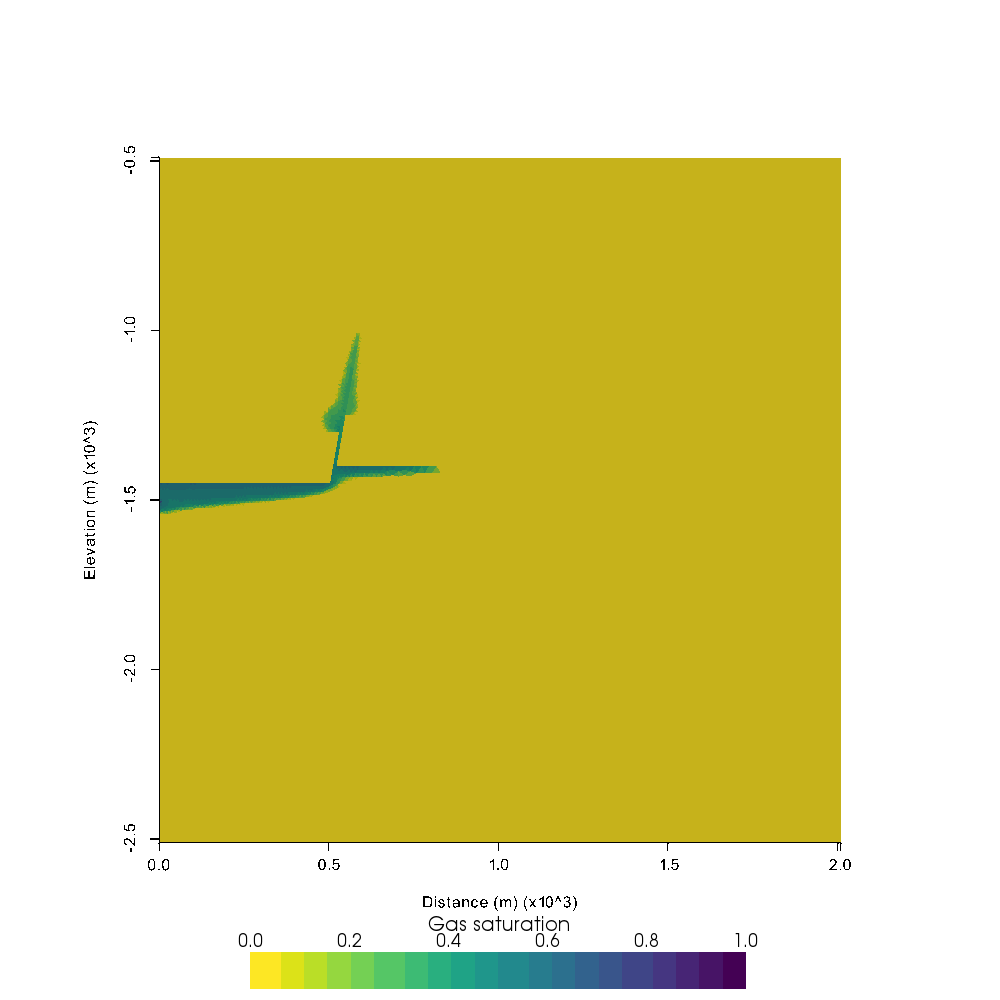

In [2]:
import pyvista
pyvista.set_plot_theme("document")

p = pyvista.Plotter(window_size=(1000, 1000), notebook=True)
p.add_mesh(
    mesh.to_pyvista(),
    scalars="SAT_G",
    stitle="Gas saturation",
    cmap="viridis_r",
    clim=(0.0, 1.0),
    n_colors=20,
    show_edges=False,
    edge_color=(0.5, 0.5, 0.5),
    scalar_bar_args={
        "height": 0.1,
        "width": 0.5,
        "position_x": 0.75,
        "position_y": 0.01,
        "vertical": False,
        "n_labels": 6,
        "fmt": "%.1f",
        "title_font_size": 20,
        "font_family": "arial",
        "shadow": True,
    },
)
p.show_grid(
    show_xaxis=True,
    show_yaxis=False,
    show_zaxis=True,
    xlabel="Distance (m)",
    zlabel="Elevation (m)",
    ticks="outside",
    font_family="arial",
    shadow=True,
)
p.view_xz()
p.show()
